In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from torchsummary import summary

from utils.dataset import SpectrogramDataset
from utils.model import SpeechResModel
from utils.train import train
from utils.utils import train_val_plot

%load_ext autoreload
%autoreload 2

# Datasets

In [9]:
path = "/home/jupyter/6692/project/data"
dataset_name = 'speech_commands_v1/imgs/n64-q3-a1-100-4000'
train_set, test_set, val_set = SpectrogramDataset.split_dataset(path, dataset_name, split_rate=[0.8,0.1,0.1])

data_shape = train_set.__getitem__(0)[0].numpy().shape

# Matlab generated Dataset

## Res15 - n1-q3-a1-100-4000

In [4]:
model = SpeechResModel(len(train_set.class_names), "res15")

print("Input shape:", data_shape)
# print(model)
summary(model.cuda(), data_shape)

Input shape: (5, 104)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 45, 5, 104]             405
            Conv2d-2           [-1, 45, 5, 104]          18,225
       BatchNorm2d-3           [-1, 45, 5, 104]               0
            Conv2d-4           [-1, 45, 5, 104]          18,225
       BatchNorm2d-5           [-1, 45, 5, 104]               0
            Conv2d-6           [-1, 45, 5, 104]          18,225
       BatchNorm2d-7           [-1, 45, 5, 104]               0
            Conv2d-8           [-1, 45, 5, 104]          18,225
       BatchNorm2d-9           [-1, 45, 5, 104]               0
           Conv2d-10           [-1, 45, 5, 104]          18,225
      BatchNorm2d-11           [-1, 45, 5, 104]               0
           Conv2d-12           [-1, 45, 5, 104]          18,225
      BatchNorm2d-13           [-1, 45, 5, 104]               0
           Conv2d

In [5]:
# save_path = "/home/jupyter/6692/project/check_points/res/n32-q3-a1-100-4000_res15.pt"
save_path = None

batch_size = 64
epochs = 10
lr = [1e-3]
subset_frac = 0.1
# subset_frac = None
device = "cuda"
log_interval = 10
weight_decay = 1e-5

train_loss_history, val_loss_history, train_acc_history, val_acc_history = train(
      model, 
      train_set, val_set, test_set,
      batch_size, epochs, lr, weight_decay,
      save_path, subset_frac, device, log_interval)

traning sample:1894
validation sample:236
testing sample:236

Using gpu: Tesla K80
Training epoches: 10
Training batches: 29

Epoch: 1
train step #0/29 acc: 0.078125, loss: 2.346247
train step #10/29 acc: 0.375000, loss: 2.158759
train step #20/29 acc: 0.250000, loss: 2.084010
Validation acc: 0.122159, loss: 2.364221
Test acc: 0.106889, loss: 2.388006
Cost time:17.379666s

Epoch: 2
train step #0/29 acc: 0.375000, loss: 1.958293
train step #10/29 acc: 0.421875, loss: 1.785926
train step #20/29 acc: 0.359375, loss: 1.857727
Validation acc: 0.153054, loss: 2.854871
Test acc: 0.164062, loss: 2.900212
Cost time:5.266686s

Epoch: 3
train step #0/29 acc: 0.500000, loss: 1.626837
train step #10/29 acc: 0.343750, loss: 1.780619
train step #20/29 acc: 0.484375, loss: 1.556682
Validation acc: 0.421520, loss: 1.643097
Test acc: 0.484730, loss: 1.553326
Cost time:4.202640s

Epoch: 4
train step #0/29 acc: 0.500000, loss: 1.460871
train step #10/29 acc: 0.515625, loss: 1.571069
train step #20/29 acc:

Best validation acc:0.560369


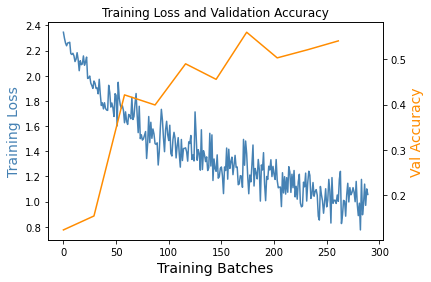

In [6]:
train_val_plot(train_loss_history, val_acc_history, save_path='./pics/n32-q3-a1-100-4000_res15_adam_loss.jpg')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

Best validation acc:0.560369


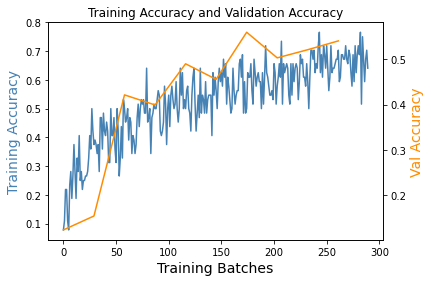

In [7]:
train_val_plot(train_acc_history, val_acc_history, 
               save_path='./pics/n32-q3-a1-100-4000_res15_adam_acc.jpg', 
               title='Training Accuracy and Validation Accuracy', 
               y_label_1='Training Accuracy')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

## Res15 - n64-q3-a1-100-4000

In [10]:
model = SpeechResModel(len(train_set.class_names), "res15")

print("Input shape:", data_shape)
# print(model)
summary(model.cuda(), data_shape)

Input shape: (64, 100)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 45, 64, 100]             405
            Conv2d-2          [-1, 45, 64, 100]          18,225
       BatchNorm2d-3          [-1, 45, 64, 100]               0
            Conv2d-4          [-1, 45, 64, 100]          18,225
       BatchNorm2d-5          [-1, 45, 64, 100]               0
            Conv2d-6          [-1, 45, 64, 100]          18,225
       BatchNorm2d-7          [-1, 45, 64, 100]               0
            Conv2d-8          [-1, 45, 64, 100]          18,225
       BatchNorm2d-9          [-1, 45, 64, 100]               0
           Conv2d-10          [-1, 45, 64, 100]          18,225
      BatchNorm2d-11          [-1, 45, 64, 100]               0
           Conv2d-12          [-1, 45, 64, 100]          18,225
      BatchNorm2d-13          [-1, 45, 64, 100]               0
           Conv2

In [11]:
# save_path = "/home/jupyter/6692/project/check_points/res/n32-q3-a1-100-4000_res15.pt"
save_path = None

batch_size = 64
epochs = 10
lr = [1e-3]
subset_frac = 0.1
# subset_frac = None
device = "cuda"
log_interval = 10
weight_decay = 1e-5

train_loss_history, val_loss_history, train_acc_history, val_acc_history = train(
      model, 
      train_set, val_set, test_set,
      batch_size, epochs, lr, weight_decay,
      save_path, subset_frac, device, log_interval)

traning sample:1894
validation sample:236
testing sample:236

Using gpu: Tesla K80
Training epoches: 10
Training batches: 29

Epoch: 1
train step #0/29 acc: 0.140625, loss: 2.304150
train step #10/29 acc: 0.343750, loss: 1.975197
train step #20/29 acc: 0.390625, loss: 1.753444
Validation acc: 0.099077, loss: 3.105335
Test acc: 0.149148, loss: 3.012257
Cost time:30.742360s

Epoch: 2
train step #0/29 acc: 0.312500, loss: 1.719474
train step #10/29 acc: 0.359375, loss: 1.706632
train step #20/29 acc: 0.453125, loss: 1.628564
Validation acc: 0.116832, loss: 2.830694
Test acc: 0.135298, loss: 2.626445
Cost time:30.033705s

Epoch: 3
train step #0/29 acc: 0.500000, loss: 1.354794
train step #10/29 acc: 0.484375, loss: 1.391787
train step #20/29 acc: 0.640625, loss: 1.258321
Validation acc: 0.533381, loss: 1.390792
Test acc: 0.568537, loss: 1.297648
Cost time:30.350346s

Epoch: 4
train step #0/29 acc: 0.562500, loss: 1.286876
train step #10/29 acc: 0.609375, loss: 1.204670
train step #20/29 ac

Best validation acc:0.800426


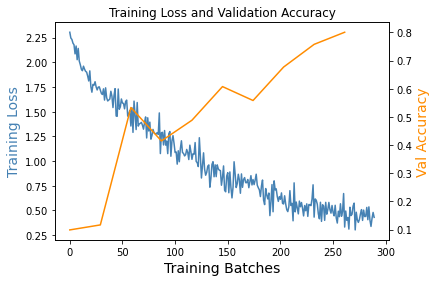

In [12]:
train_val_plot(train_loss_history, val_acc_history, save_path='./pics/n32-q3-a1-100-4000_res15_adam_loss.jpg')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

Best validation acc:0.800426


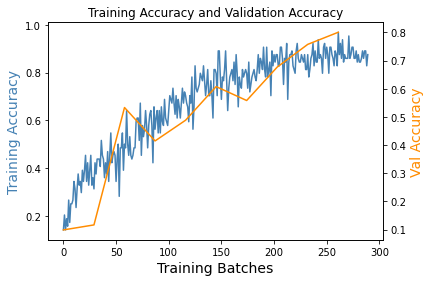

In [13]:
train_val_plot(train_acc_history, val_acc_history, 
               save_path='./pics/n32-q3-a1-100-4000_res15_adam_acc.jpg', 
               title='Training Accuracy and Validation Accuracy', 
               y_label_1='Training Accuracy')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

## Res15 - n32-q3-a1-100-4000

In [5]:
model = SpeechResModel(len(train_set.class_names), "res15")

print("Input shape:", data_shape)
# print(model)
summary(model.cuda(), data_shape)

Input shape: (32, 100)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 45, 32, 100]             405
            Conv2d-2          [-1, 45, 32, 100]          18,225
       BatchNorm2d-3          [-1, 45, 32, 100]               0
            Conv2d-4          [-1, 45, 32, 100]          18,225
       BatchNorm2d-5          [-1, 45, 32, 100]               0
            Conv2d-6          [-1, 45, 32, 100]          18,225
       BatchNorm2d-7          [-1, 45, 32, 100]               0
            Conv2d-8          [-1, 45, 32, 100]          18,225
       BatchNorm2d-9          [-1, 45, 32, 100]               0
           Conv2d-10          [-1, 45, 32, 100]          18,225
      BatchNorm2d-11          [-1, 45, 32, 100]               0
           Conv2d-12          [-1, 45, 32, 100]          18,225
      BatchNorm2d-13          [-1, 45, 32, 100]               0
           Conv2

In [8]:
save_path = "/home/jupyter/6692/project/check_points/res/n32-q3-a1-100-4000_res15.pt"

batch_size = 64
epochs = 10
lr = [1e-3]
# subset_frac = 0.1
subset_frac = None
device = "cuda"
log_interval = 100
weight_decay = 1e-5

train_loss_history, val_loss_history, train_acc_history, val_acc_history = train(
      model, 
      train_set, val_set, test_set,
      batch_size, epochs, lr, weight_decay,
      save_path, subset_frac, device, log_interval)

traning sample:18945
validation sample:2369
testing sample:2368

Using gpu: Tesla K80
Training epoches: 10
Training batches: 296

Epoch: 1
train step #0/296 acc: 0.046875, loss: 2.316167
train step #100/296 acc: 0.718750, loss: 0.884041
train step #200/296 acc: 0.953125, loss: 0.377084
Validation acc: 0.789474, loss: 0.712484
saving best model ...
Test acc: 0.793074, loss: 0.673205
Cost time:158.133963s

Epoch: 2
train step #0/296 acc: 0.953125, loss: 0.325778
train step #100/296 acc: 0.906250, loss: 0.230714
train step #200/296 acc: 0.968750, loss: 0.180332
Validation acc: 0.880345, loss: 0.409398
saving best model ...
Test acc: 0.883446, loss: 0.412066
Cost time:157.045313s

Epoch: 3
train step #0/296 acc: 0.937500, loss: 0.276795
train step #100/296 acc: 0.968750, loss: 0.152239
train step #200/296 acc: 0.953125, loss: 0.142108
Validation acc: 0.878701, loss: 0.394949
Test acc: 0.877534, loss: 0.387822
Cost time:156.601957s

Epoch: 4
train step #0/296 acc: 0.937500, loss: 0.174759
t

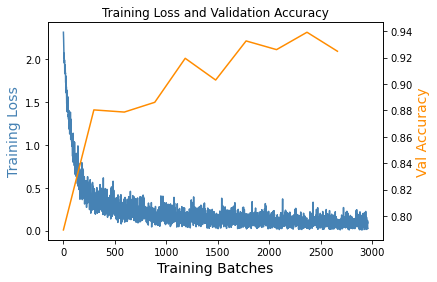

Best validation acc:0.939145


In [9]:
train_val_plot(train_loss_history, val_acc_history, save_path='./pics/n32-q3-a1-100-4000_res15_adam_loss.jpg')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

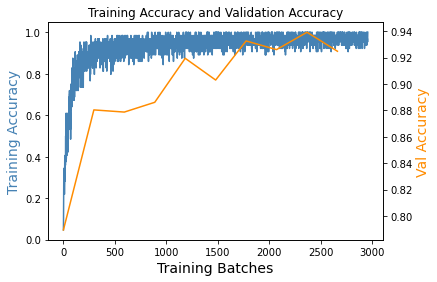

Best validation acc:0.939145


In [12]:
train_val_plot(train_acc_history, val_acc_history, 
               save_path='./pics/n32-q3-a1-100-4000_res15_adam_acc.jpg', 
               title='Training Accuracy and Validation Accuracy', 
               y_label_1='Training Accuracy')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

# Python generated Dataset

## Res15

In [22]:
model = SpeechResModel(len(train_set.class_names), "res15")

print("Input shape:", data_shape)
# print(model)
summary(model.cuda(), data_shape)

Input shape: (1, 40, 101)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 45, 40, 101]             405
            Conv2d-2          [-1, 45, 40, 101]          18,225
       BatchNorm2d-3          [-1, 45, 40, 101]               0
            Conv2d-4          [-1, 45, 40, 101]          18,225
       BatchNorm2d-5          [-1, 45, 40, 101]               0
            Conv2d-6          [-1, 45, 40, 101]          18,225
       BatchNorm2d-7          [-1, 45, 40, 101]               0
            Conv2d-8          [-1, 45, 40, 101]          18,225
       BatchNorm2d-9          [-1, 45, 40, 101]               0
           Conv2d-10          [-1, 45, 40, 101]          18,225
      BatchNorm2d-11          [-1, 45, 40, 101]               0
           Conv2d-12          [-1, 45, 40, 101]          18,225
      BatchNorm2d-13          [-1, 45, 40, 101]               0
           Co

### train res15

In [16]:
save_path = "/home/jupyter/6692/project/check_points/res/best_model_res15.pt"

batch_size = 64
epochs = 26
lr = [1e-3]
# subset_frac = 0.1
subset_frac = None
device = "cuda"
log_interval = 100

train_loss_history, val_loss_history, train_acc_history, val_acc_history = train(
      model, 
      train_set, val_set, test_set,
      batch_size, epochs, lr,
      save_path, subset_frac, device, log_interval)

traning sample:18945
validation sample:2369
testing sample:2368

Using gpu: Tesla K80
Training epoches: 26
Training batches: 296

Epoch: 1
train step #0/296 acc: 0.109375, loss: 2.323779
train step #100/296 acc: 0.812500, loss: 0.868304
train step #200/296 acc: 0.843750, loss: 0.554347
Validation acc: 0.812911, loss: 0.660420
saving best model ...
Test acc: 0.828970, loss: 0.593171
Cost time:616.914654s

Epoch: 2
train step #0/296 acc: 0.937500, loss: 0.313198
train step #100/296 acc: 0.921875, loss: 0.205472
train step #200/296 acc: 0.890625, loss: 0.340546
Validation acc: 0.926398, loss: 0.338442
saving best model ...
Test acc: 0.949324, loss: 0.168511
Cost time:191.523170s

Epoch: 3
train step #0/296 acc: 0.906250, loss: 0.221243
train step #100/296 acc: 0.968750, loss: 0.112912
train step #200/296 acc: 0.921875, loss: 0.206295
Validation acc: 0.933799, loss: 0.258725
saving best model ...
Test acc: 0.948057, loss: 0.165011
Cost time:190.907779s

Epoch: 4
train step #0/296 acc: 0.93

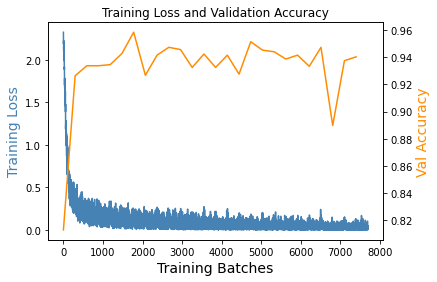

Best validation acc:0.958470


In [20]:
train_val_plot(train_loss_history, val_acc_history, save_path='res15.jpg')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

## Res8

In [23]:
model = SpeechResModel(len(train_set.class_names), "res8")

print("Input shape:", data_shape)
# print(model)
summary(model.cuda(), data_shape)

Input shape: (1, 40, 101)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 45, 40, 101]             405
         AvgPool2d-2           [-1, 45, 10, 33]               0
            Conv2d-3           [-1, 45, 10, 33]          18,225
       BatchNorm2d-4           [-1, 45, 10, 33]               0
            Conv2d-5           [-1, 45, 10, 33]          18,225
       BatchNorm2d-6           [-1, 45, 10, 33]               0
            Conv2d-7           [-1, 45, 10, 33]          18,225
       BatchNorm2d-8           [-1, 45, 10, 33]               0
            Conv2d-9           [-1, 45, 10, 33]          18,225
      BatchNorm2d-10           [-1, 45, 10, 33]               0
           Conv2d-11           [-1, 45, 10, 33]          18,225
      BatchNorm2d-12           [-1, 45, 10, 33]               0
           Conv2d-13           [-1, 45, 10, 33]          18,225
      BatchNo

In [24]:
save_path = "/home/jupyter/6692/project/check_points/res/best_model_res8.pt"

batch_size = 64
epochs = 26
lr = [1e-3]
# subset_frac = 0.1
subset_frac = None
device = "cuda"
log_interval = 100

train_loss_history, val_loss_history, train_acc_history, val_acc_history = train(
      model, 
      train_set, val_set, test_set,
      batch_size, epochs, lr,
      save_path, subset_frac, device, log_interval)

traning sample:18945
validation sample:2369
testing sample:2368

Using gpu: Tesla K80
Training epoches: 26
Training batches: 296

Epoch: 1
train step #0/296 acc: 0.109375, loss: 2.343287
train step #100/296 acc: 0.734375, loss: 1.141923
train step #200/296 acc: 0.859375, loss: 0.712636
Validation acc: 0.780839, loss: 0.754665
saving best model ...
Test acc: 0.767314, loss: 0.771220
Cost time:29.630963s

Epoch: 2
train step #0/296 acc: 0.906250, loss: 0.498625
train step #100/296 acc: 0.937500, loss: 0.326461
train step #200/296 acc: 0.968750, loss: 0.261627
Validation acc: 0.849918, loss: 0.512903
saving best model ...
Test acc: 0.847551, loss: 0.501318
Cost time:28.652111s

Epoch: 3
train step #0/296 acc: 0.921875, loss: 0.353020
train step #100/296 acc: 0.953125, loss: 0.189082
train step #200/296 acc: 0.984375, loss: 0.150311
Validation acc: 0.923931, loss: 0.280345
saving best model ...
Test acc: 0.921453, loss: 0.298027
Cost time:29.912746s

Epoch: 4
train step #0/296 acc: 0.93750

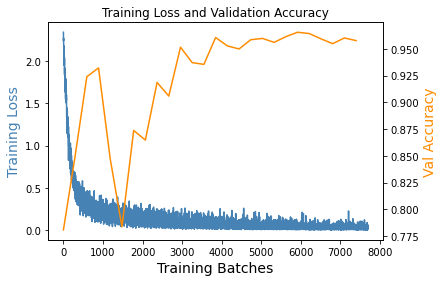

Best validation acc:0.965461


In [25]:
train_val_plot(train_loss_history, val_acc_history, save_path='res8.jpg')
print("Best validation acc:{:4f}".format(np.max(val_acc_history)))

## Res26